# Regresion Líneal sencilla con Stats

## Relaciones lineales

Armemos una relación entre Celsius y Farenheit

In [1]:
c = lambda f: 5/9*(f-32)

Armemos una comprensión de lista con esta función para todas las temeperaturas del 0 al 100 de 10 en 10

In [2]:
temp = 0
a_conv_tup =[]
for i in range(0,10):
    temp += 10
    a_conv_tup.append(temp)

tuple(enumerate(a_conv_tup))

((0, 10),
 (1, 20),
 (2, 30),
 (3, 40),
 (4, 50),
 (5, 60),
 (6, 70),
 (7, 80),
 (8, 90),
 (9, 100))

In [4]:
#correccion profe

relacion_temperaturas = [(f,c(f)) for f in range(0,101,10)]
relacion_temperaturas

[(0, -17.77777777777778),
 (10, -12.222222222222223),
 (20, -6.666666666666667),
 (30, -1.1111111111111112),
 (40, 4.444444444444445),
 (50, 10.0),
 (60, 15.555555555555557),
 (70, 21.11111111111111),
 (80, 26.666666666666668),
 (90, 32.22222222222222),
 (100, 37.77777777777778)]

Importa Pandas

In [5]:
import pandas as pd

Creamos un DataFrame con las listas

In [6]:
tenp_df = pd.DataFrame(relacion_temperaturas, columns = ["Farenheit","Celsius"])

In [7]:
tenp_df

,Farenheit,Celsius
0,0,-17.777778
1,10,-12.222222
2,20,-6.666667
3,30,-1.111111
4,40,4.444444
5,50,10.000000
6,60,15.555556
7,70,21.111111
8,80,26.666667
9,90,32.222222


Arma una gráfica que muestre esta relación

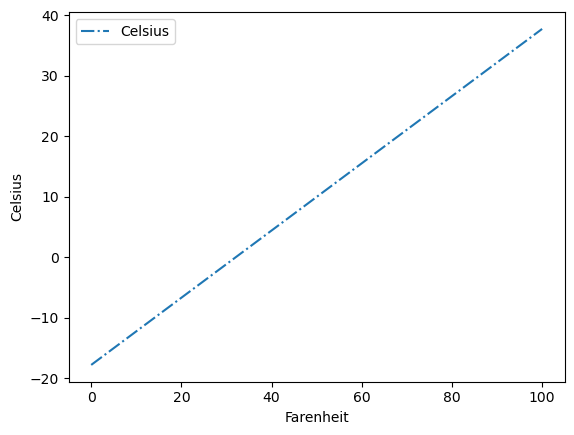

In [13]:
axes=tenp_df.plot(x="Farenheit",y="Celsius",style="-.")
ylabel = axes.set_ylabel("Celsius")

Ponle etiquetas

## y = mx + b  formato general de formula de la regresion lineal
### y = variable pendiente (variable que controla x)
### x = variable independiente(variable que modificamos nosotros)
### m pendiente de la recta
###     - m>0: la recta sube
###     - m=0: la recata es shorizontal
###     - m<0: la recta baja
### b = interseccion #punto donde se corta con el eje vertical (y)

## Regresión lineal con King_county

Carga los datos de King county a un dataframe

In [18]:
king_county_df = pd.read_csv("kc_house_data.csv")

Veamos el Head

In [19]:
king_county_df.head()

,sqft,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


Veamos el Tail

In [20]:
king_county_df.tail()

,sqft,price
21608,1530,360000.0
21609,2310,400000.0
21610,1020,402101.0
21611,1600,400000.0
21612,1020,325000.0


Vamos cambiando los titulos de columnas

In [35]:
king_county_df=king_county_df.rename(columns={"sqft":"cuadrado_pies"})

saca tu nuevo head

In [48]:
king_county_df.head()

,Sequela,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


Importa stats de scipy

In [29]:
from scipy import stats 

Arma un modelo de regresión lineal

In [38]:
reglin = stats.linregress(x=king_county_df.Sequela, y = king_county_df.price)

Chea la pendiente

In [39]:
reglin

LinregressResult(slope=np.float64(280.8066899295006), intercept=np.float64(-43867.60153385543), rvalue=np.float64(0.7020437212325269), pvalue=np.float64(0.0), stderr=np.float64(1.9376149902337942), intercept_stderr=np.float64(4405.4554432890345))

In [40]:
reglin.slope # saca la pendiente por cada pie^2 //^280 $

np.float64(280.8066899295006)

Checa la intercepción

In [41]:
reglin.intercept # si hubiera una casa con 0 pies cuadrados valdria eso

np.float64(-43867.60153385543)

PrecioVenta = 280.80*Areaft - 43,867.60

Vamos a predecir el precio de alguna casa

In [42]:
casaFila_10 = reglin.slope*1890 - reglin.intercept
casaFila_10

np.float64(574592.2455006115)

Compara con la realidad

In [43]:
reglin

LinregressResult(slope=np.float64(280.8066899295006), intercept=np.float64(-43867.60153385543), rvalue=np.float64(0.7020437212325269), pvalue=np.float64(0.0), stderr=np.float64(1.9376149902337942), intercept_stderr=np.float64(4405.4554432890345))

R^2 = r ^ 2 (Coheficiente de determinacion)
R^2 = 0.70 ^ 2 = 49% de la variacion de y se explica por x 

rvalue = 1 # correlacion perfecta positiva 
rvalue = 0 # no hay relacion lineal
rvalue = -1 # correlacion perfecta negativa


### Hacer la gráfica

Importa Seaborn

In [45]:
import seaborn as sns

Pon el estilo como Whitegrid

In [46]:
sns.set_style("whitegrid")

Arma una regplot de sns

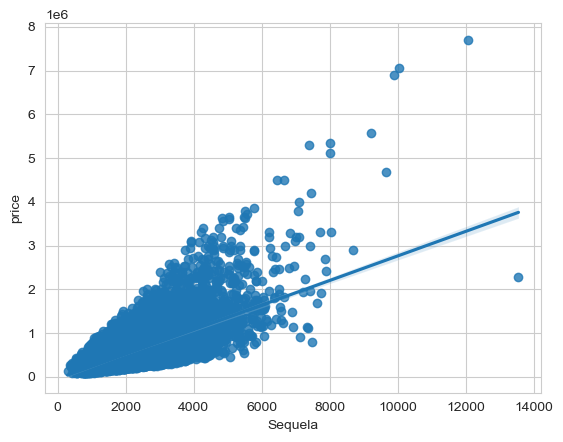

In [49]:
axes = sns.regplot(x=king_county_df.Sequela,y=king_county_df.price)

In [51]:
sns.regplot?

Signature:
sns.regplot(
    data=None,
    *,
    x=None,
    y=None,
    x_estimator=None,
    x_bins=None,
    x_ci='ci',
    scatter=True,
    fit_reg=True,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    order=1,
    logistic=False,
    lowess=False,
    robust=False,
    logx=False,
    x_partial=None,
    y_partial=None,
    truncate=True,
    dropna=True,
    x_jitter=None,
    y_jitter=None,
    label=None,
    color=None,
    marker='o',
    scatter_kws=None,
    line_kws=None,
    ax=None,
)
Docstring:
Plot data and a linear regression model fit.

There are a number of mutually exclusive options for estimating the
regression model. See the :ref:`tutorial <regression_tutorial>` for more
information.    

Parameters
----------
x, y: string, series, or vector array
    Input variables. If strings, these should correspond with column names
    in ``data``. When pandas objects are used, axes will be labeled with
    the series name.
data : DataFrame
    Tidy ("long-

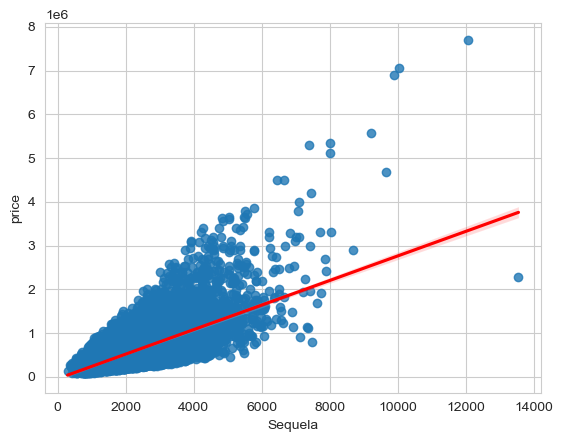

In [53]:
axes = sns.regplot(x=king_county_df.Sequela,y=king_county_df.price, line_kws={"color":"red"})